<a href="https://colab.research.google.com/github/kaustubh-Beta/ColabNbs/blob/master/PytorchPretrained/PytorchPretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using pre-trained models in pytorch


In [0]:
from torchvision import models
import torch
dir(models)

In [3]:
# Loading the pretrained model
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:02<00:00, 81633675.98it/s] 


In [4]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [0]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [6]:
!wget https://www.learnopencv.com/wp-content/uploads/2019/05/dog.jpg

--2019-06-27 21:32:11--  https://www.learnopencv.com/wp-content/uploads/2019/05/dog.jpg
Resolving www.learnopencv.com (www.learnopencv.com)... 104.25.119.33, 104.25.118.33, 2606:4700:20::6819:7621, ...
Connecting to www.learnopencv.com (www.learnopencv.com)|104.25.119.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78949 (77K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  77.10K  --.-KB/s    in 0.01s   

2019-06-27 21:32:11 (6.26 MB/s) - ‘dog.jpg’ saved [78949/78949]



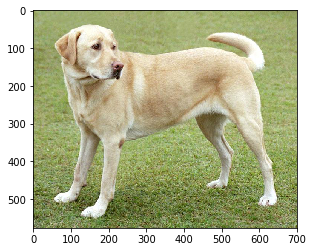

In [8]:
from PIL import Image
import matplotlib.pyplot as plt 
img = Image.open("dog.jpg")
plt.imshow(img)
plt.show()

In [0]:
# Pre-processing the image 
img_t = transform(img)
batch_t = torch.unsqueeze(img_t,0)

In [11]:
alexnet.eval()
output = alexnet(batch_t)
print(output.shape)

torch.Size([1, 1000])


In [13]:
!wget https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt

--2019-06-27 21:39:00--  https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21674 (21K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  21.17K  --.-KB/s    in 0.01s   

2019-06-27 21:39:00 (1.68 MB/s) - ‘imagenet_classes.txt’ saved [21674/21674]



In [0]:
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

In [17]:
_ , index = torch.max(output,1)
percentage = torch.nn.functional.softmax(output, dim=1)[0]*100
print(classes[index[0]],percentage[index[0]].item())

Labrador retriever 41.585166931152344




---

Using ResNet for image classification


In [19]:
# Loading the model 
resnet = models.resnet101(pretrained = True)

# set the network in eval mode
resnet.eval()

# output vector
output = resnet(batch_t)

# Printing the top-5 classes predicted by the model
_, indices = torch.sort(output, descending=True)
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Labrador retriever', 48.25556945800781),
 ('dingo, warrigal, warragal, Canis dingo', 7.900787353515625),
 ('golden retriever', 6.916920185089111),
 ('Eskimo dog, husky', 3.6434383392333984),
 ('bull mastiff', 3.0461232662200928)]